# k-nearest neighbors classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import log_metrics

from knn import KNN

** Generate training and test sets **

In [2]:
size =1000

coefficients = [0,-1.4,2.6,-3,12.4,-8]
x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    x[:,i]=np.random.rand(size)
y = np.vectorize(lambda x: round(1/(1+math.exp(-x))))
y = y((x*coefficients).sum(axis=1) + np.random.normal(size=size))

t_x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    t_x[:,i]=np.random.rand(size)
t_y = np.vectorize(lambda x: round(1/(1+math.exp(-x))))
t_y = t_y((t_x*coefficients).sum(axis=1) + np.random.normal(size=size))

In [3]:
print((y==0).sum(),(y==1).sum())

402 598


Note - set is deliberately slightly imbalanced

### KNN classifier

In [4]:
knn = KNN()

Fitting doesn't actualy perform any task other than save the data (no k-d-tree or fancy optimizations)

In [5]:
knn.fit(x,y)

** Prediction **<br>
5 neighbors (arbitrary choice)

In [6]:
pred = knn.predict(t_x,5)

** Check total accuracy **

In [7]:
knn.score(t_x,t_y)

0.899

Check accuracy using a different k (default is the last k used)

In [8]:
knn.score(t_x,t_y,9)

0.907

** Accuracy is going up, perhaps 5 was not a good choice after all.. **

### Optimization

In [9]:
# try to find which k provides the highest accuracy
acc = []
for i in range(1,50,2):
    p = knn.predict(t_x,i)
    acc.append(knn.score(t_x,t_y))

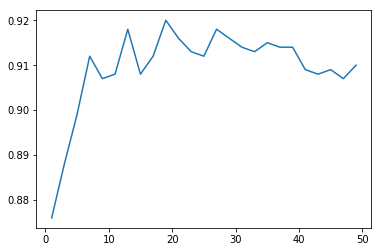

In [10]:
plt.plot(range(1,50,2),acc)
plt.show()

** Overall, the results are very close (note scale of y-axis) but ~19 neighbors appears to be slighly better **

In [13]:
pred = knn.predict(t_x,19)
(pred==t_y).mean()

0.92

** Note: using an even number of neighbors might cause ties in the voting, potentially affecting accuracy **

In [16]:
pred = knn.predict(t_x,18)
(pred==t_y).mean()

Note: KNN is not advised using an even number of neighbors


0.92

In our case, because the dataset is artificially perfect (noise only), the performance is not affected